In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.linalg import sqrtm
from copy import deepcopy
from sklearn.decomposition import PCA
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs

In [2]:
## load data
train = pd.read_csv('cleaned_data/TestSet_withpast3_new2_woDecimal_200products_newcolumns.csv')
#train2 = pd.read_csv('cleaned_data/DataMulticlass_6_withpast2.csv')
test = pd.read_csv('sampleSubmission.csv')

In [3]:
## fill missing values
train['Gender'].fillna('no_gender', inplace=True)
train['State'].fillna('no_state', inplace=True)

In [4]:
prod_dict = {'_'}

#train = pd.get_dummies(train, columns=['product_code'], prefix=prod_dict)
train.columns=train.columns.str.replace('_5','')
train.columns=train.columns.str.replace('_4','')
train.columns=train.columns.str.replace('_3','')
train.columns=train.columns.str.replace('_2','')
train.columns=train.columns.str.replace('_1','')
train.reset_index(drop=True).head()

,customerID,Gender,State,storecode,transactionnumberbytill,100105505,108000537,108000568,108000599,108000653,...,1000059431,1000067678,1000088419,1000088500,1000123958,1000171548,1000336252,1000609658,1000638372,1000694851
0,BBID_20470,male,no_state,2,51389,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BBID_20470,male,no_state,2,51389,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BBID_20470,male,no_state,2,51389,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BBID_20470,male,no_state,2,51389,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BBID_20470,male,no_state,2,51389,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test = test[['customerID']]

In [6]:
true = deepcopy(train)

In [7]:
users = true['customerID'].tolist()
true.drop('customerID', axis=1, inplace=True)
true.drop('Gender', axis=1, inplace=True)
true.drop('State', axis=1, inplace=True)
true.drop('storecode', axis=1, inplace=True)
true.drop('transactionnumberbytill', axis=1, inplace=True)

items = true.columns.tolist()
u = {}
for i in range(len(users)):
    u[users[i]] = i

trueMat = np.array(true)
print("users dict formed")

users dict formed


In [8]:
def reorder(train):
    train.index = train['customerID'].tolist()
    train.drop('customerID', axis=1, inplace=True)
    train.drop('Gender', axis=1, inplace=True)
    train.drop('State', axis=1, inplace=True)
    train.drop('storecode', axis=1, inplace=True)
    train.drop('transactionnumberbytill', axis=1, inplace=True)
    train = train.reindex(users)
    return train

In [9]:
train = reorder(train)

In [10]:
train.head()

,100105505,108000537,108000568,108000599,108000653,108000655,108000656,108000667,108000704,108000707,...,1000059431,1000067678,1000088419,1000088500,1000123958,1000171548,1000336252,1000609658,1000638372,1000694851
BBID_20470,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBID_20470,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBID_20470,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBID_20470,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBID_20470,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train = train.dropna()

In [15]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = ['BBID_20470', 'BBID_20500', 'BBID_21600']

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(train.loc[indices], columns = train.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)


#percentiles = train.rank(pct=True)
#percentiles = 100*percentiles.round(decimals=3)
#percentiles = percentiles.iloc[indices]

#plt.figure(figsize=(20,10))
#plt.axes().set_title("HeatMap")
#sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cbar=False, square=True)

Chosen samples of wholesale customers dataset:


,100105505,108000537,108000568,108000599,108000653,108000655,108000656,108000667,108000704,108000707,...,1000059431,1000067678,1000088419,1000088500,1000123958,1000171548,1000336252,1000609658,1000638372,1000694851
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
samples = samples.dropna()

Dimension 1     0.3642
Dimension 2     0.3984
Dimension 3     0.4277
Dimension 4     0.4561
Dimension 5     0.4825
Dimension 6     0.5065
Dimension 7     0.5290
Dimension 8     0.5475
Dimension 9     0.5656
Dimension 10    0.5832
Dimension 11    0.6002
Dimension 12    0.6165
Dimension 13    0.6319
Dimension 14    0.6458
Dimension 15    0.6596
Dimension 16    0.6730
Dimension 17    0.6860
Dimension 18    0.6986
Dimension 19    0.7108
Dimension 20    0.7227
Name: Explained Variance, dtype: float64


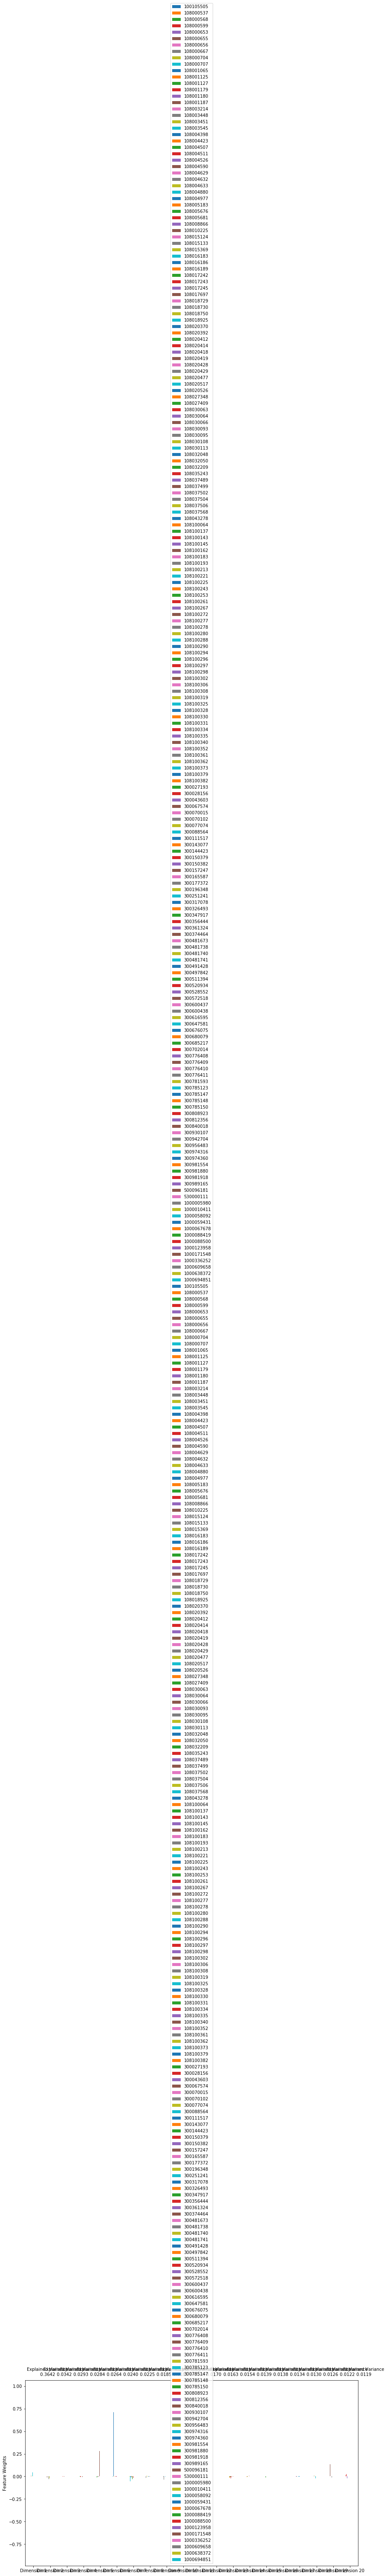

In [20]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=20).fit(train)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pca_results = vs.pca_results(train, pca)

print(pca_results['Explained Variance'].cumsum())


,Explained Variance,100105505,108000537,108000568,108000599,108000653,108000655,108000656,108000667,108000704,...,1000059431,1000067678,1000088419,1000088500,1000123958,1000171548,1000336252,1000609658,1000638372,1000694851
Dimension 1,0.3642,0.0002,0.0,-0.0,0.0014,-0.0,0.0036,0.0,0.0248,0.0030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 2,0.0342,-0.0001,0.0,0.0,-0.0007,-0.0,-0.0019,0.0,-0.0216,-0.0015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 3,0.0293,-0.0000,-0.0,0.0,-0.0000,-0.0,-0.0000,-0.0,-0.0006,-0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 4,0.0284,-0.0001,0.0,-0.0,-0.0006,0.0,-0.0018,0.0,-0.0257,-0.0015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 5,0.0264,-0.0002,0.0,-0.0,-0.0010,-0.0,-0.0030,-0.0,-0.0457,-0.0024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 6,0.0240,-0.0000,0.0,0.0,-0.0000,0.0,-0.0001,0.0,-0.0013,-0.0001,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 7,0.0225,-0.0003,0.0,0.0,-0.0016,-0.0,-0.0048,-0.0,-0.1003,-0.0038,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 8,0.0185,-0.0000,-0.0,-0.0,-0.0001,-0.0,-0.0004,0.0,-0.0169,-0.0003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimension 9,0.0181,-0.0001,-0.0,-0.0,-0.0006,-0.0,-0.0018,0.0,-0.0965,-0.0014,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Dimension 10,0.0176,-0.0000,-0.0,0.0,-0.0001,0.0,-0.0004,-0.0,-0.0309,-0.0003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


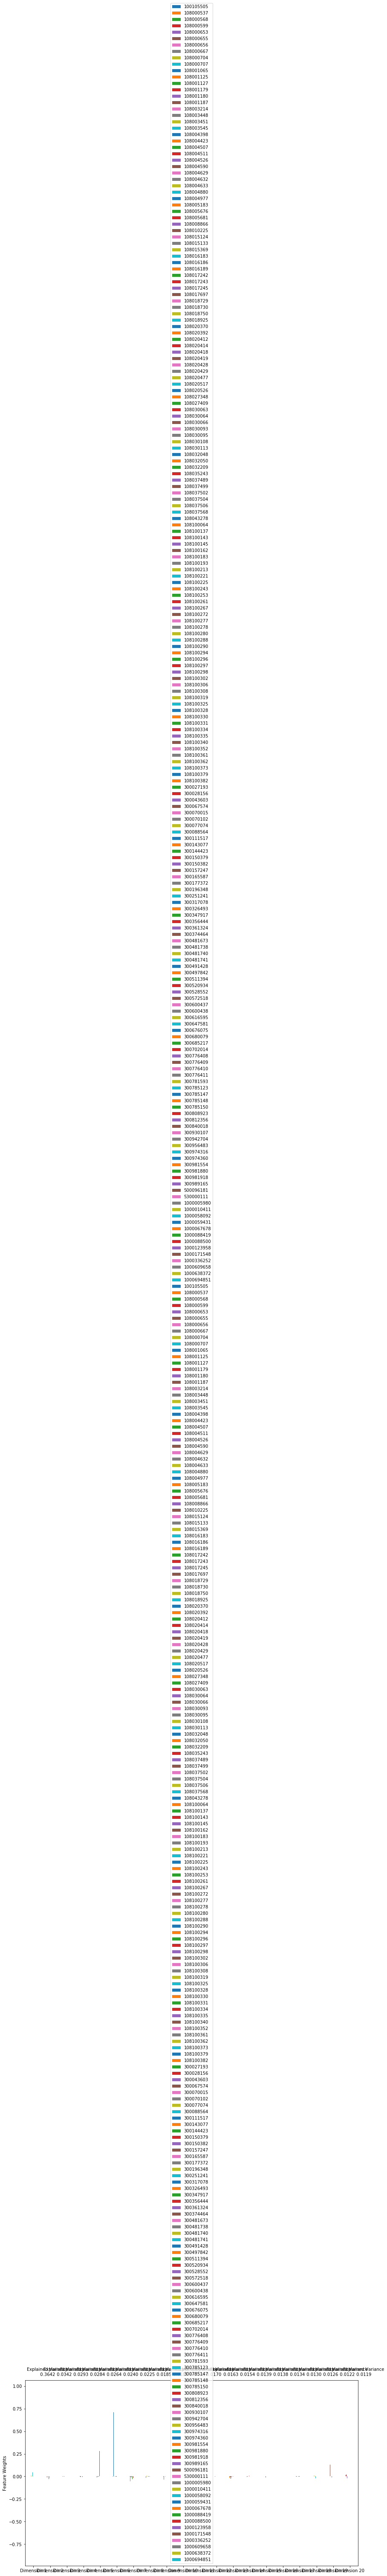

In [23]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=20).fit(train)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5',
                                                    'Dimension 6','Dimension 7','Dimension 8','Dimension 9','Dimension 10',
                                                    'Dimension 11','Dimension 12','Dimension 13','Dimension 14','Dimension 15',
                                                    'Dimension 16','Dimension 17','Dimension 18','Dimension 19','Dimension 20'])

vs.pca_results(train, pca)

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5',
                                                    'Dimension 6','Dimension 7','Dimension 8','Dimension 9','Dimension 10',
                                                    'Dimension 11','Dimension 12','Dimension 13','Dimension 14','Dimension 15',
                                                    'Dimension 16','Dimension 17','Dimension 18','Dimension 19','Dimension 20']))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,Dimension 10,Dimension 11,Dimension 12,Dimension 13,Dimension 14,Dimension 15,Dimension 16,Dimension 17,Dimension 18,Dimension 19,Dimension 20
0,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
1,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
2,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
3,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
4,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
5,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
6,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
7,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
8,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101
9,0.5345,-0.0259,-0.0006,-0.0211,-0.0317,-0.0007,-0.0434,-0.0027,-0.0131,-0.003,-0.021,-0.0,-0.0335,-0.0035,0.0027,0.0164,-0.0084,0.016,0.0058,0.0101


In [ ]:
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score

def silhouette(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score, preds

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score,_ = silhouette(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)